## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [2]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#contact TA or instructor if this cell does not work - mostly because you have old versions of some packages
try:
    data=fasion_mnist.data.values
except:
    data=fasion_mnist.data
#data should be numpy array
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [4]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [5]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [6]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [7]:
[target.min(), target.max()]

[0, 9]

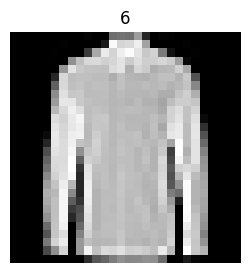

<Figure size 640x480 with 0 Axes>

In [8]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)

#### we need the function plot_components for visualization

In [10]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [11]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from sklearn.decomposition import IncrementalPCA
import numpy as np
import matplotlib.pyplot as plt

pca = IncrementalPCA(n_components=2)

transformed_data = pca.fit_transform(data)

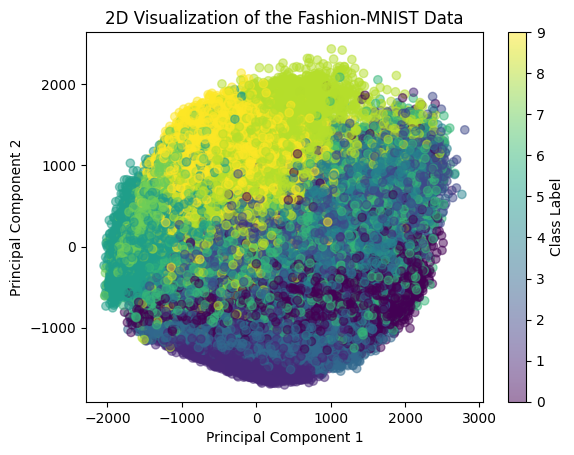

In [15]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5, c=target, cmap='viridis')
ax.set_title('2D Visualization of the Fashion-MNIST Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add a color bar to the plot to show the correspondence between color and class labels
colorbar = plt.colorbar(scatter)
colorbar.set_label('Class Label')

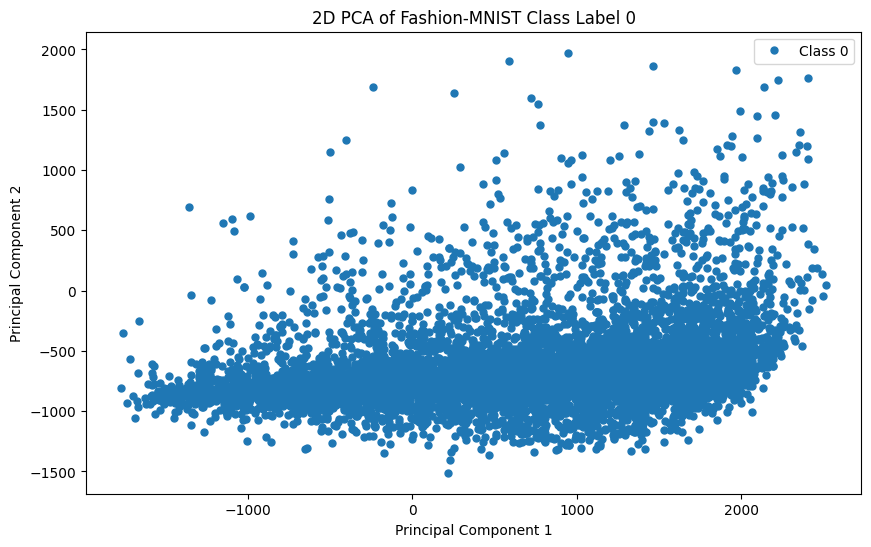

In [17]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

transformed_data_class_0 = transformed_data[target==0]
images_class_0 = images[target==0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(transformed_data_class_0[:, 0], transformed_data_class_0[:, 1], 'o', markersize=5, label='Class 0')


ax.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Fashion-MNIST Class Label 0')
plt.show()

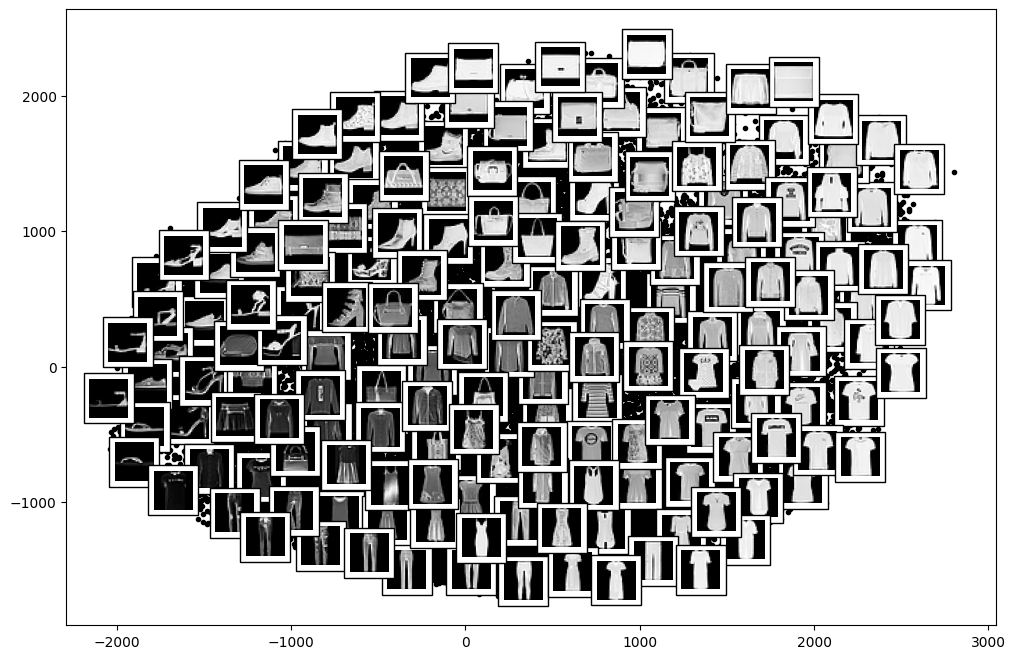

In [18]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

fig, ax = plt.subplots(figsize=(12, 8))
plot_components(data, pca, images, ax=ax, thumb_frac=0.05, cmap='gray')
plt.show()

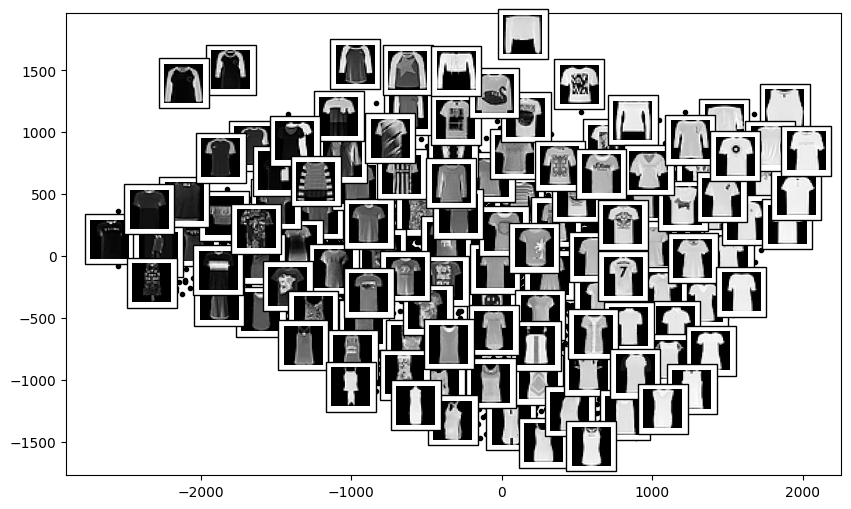

In [20]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
# Filter data and images for class label=0
data_class_0 = data[target == 0]
images_class_0 = images[target == 0]


pca = IncrementalPCA(n_components=2)


fig, ax = plt.subplots(figsize=(10, 6))

plot_components(data_class_0, pca, images_class_0, ax=ax, thumb_frac=0.05, cmap='gray')

plt.show()

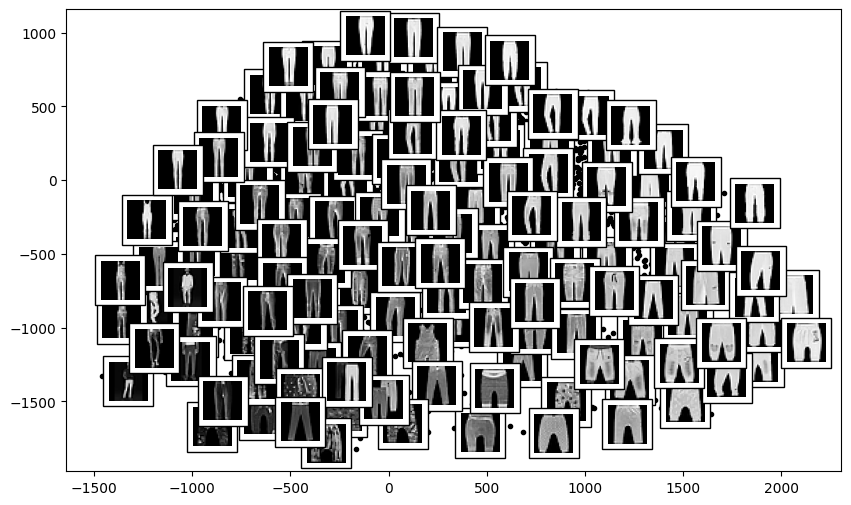

In [23]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
data_class_1 = data[target == 1]
images_class_1 = images[target == 1]

fig, ax = plt.subplots(figsize=(10, 6))

plot_components(data_class_1, pca, images_class_1, ax=ax, thumb_frac=0.05, cmap='gray')

plt.show()

From the above examples, we can see that PCA can extract meaningful features from the images

### 2. Use PCA to generate new images

First, we need to figure out how many components we need

In [25]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
pca = IncrementalPCA(n_components=100)
pca.fit(data)

IncrementalPCA(n_components=100)

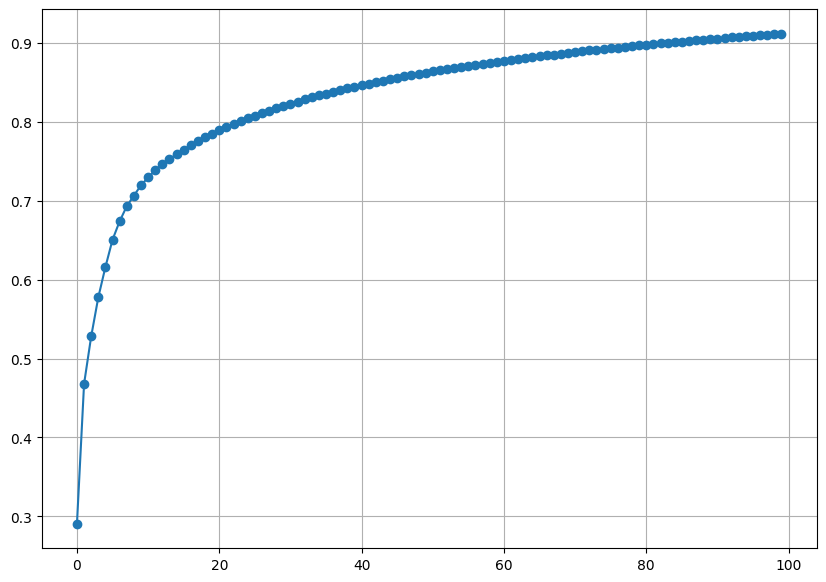

In [27]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 7))
plt.plot(range(0,100), cumulative_explained_variance, marker='o', linestyle='-')

plt.grid(True)
plt.show()

In [28]:
# write code to find the smallest value of n_component such that
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same, so you just use (3)
# you do not need to re-fit the model using this new value of n_component
threshold = 0.8

n_components_required = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

n_components_required

24

In [29]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)
from sklearn.decomposition import IncrementalPCA

mu = pca.mean_
v = pca.explained_variance_
w = pca.components_

In [30]:
v.shape

(100,)

In [31]:
w.shape

(100, 784)

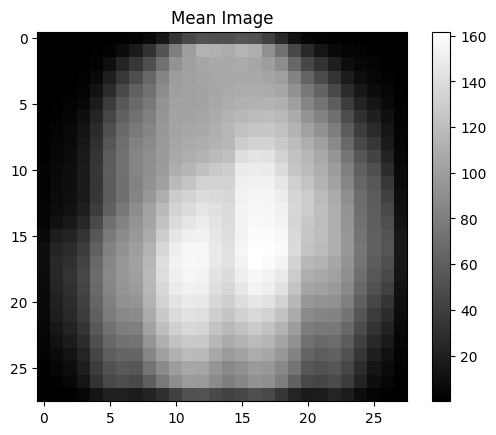

In [32]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')
plt.colorbar()
plt.title('Mean Image')
plt.show()

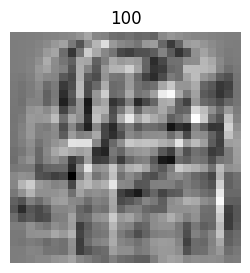

<Figure size 640x480 with 0 Axes>

In [34]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    ax.imshow(w[n].reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title(n+1)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)



In [ ]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

In [ ]:
# generate a random number
3*np.random.randn()

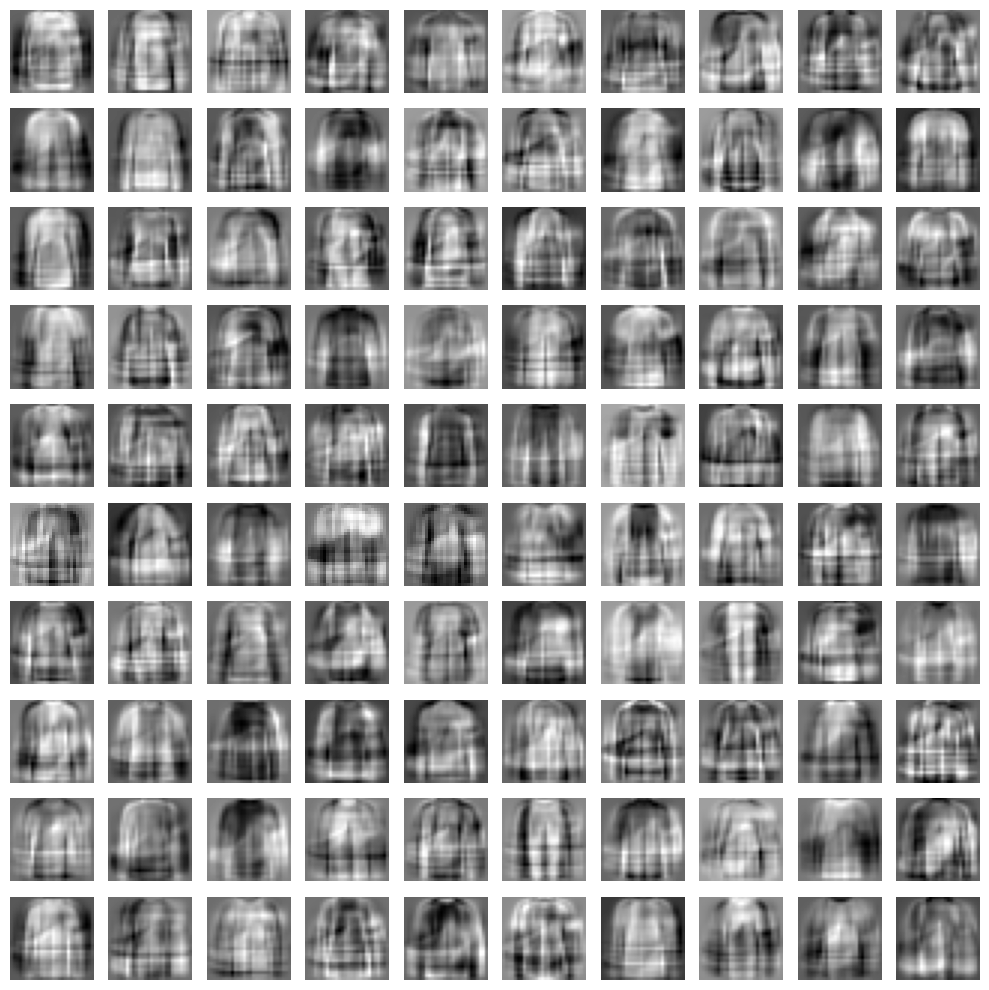

In [39]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

k = len(v)
num_images = 100

fig, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = ax.flatten()

for i in range(num_images):
    y = 3 * np.random.randn(k)

    x_new = mu.copy()

    for n in range(k):
        x_new += y[n] * np.sqrt(v[n]) * w[n]

    image = x_new.reshape(28, 28)

    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')


plt.tight_layout()
plt.show()


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [36]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

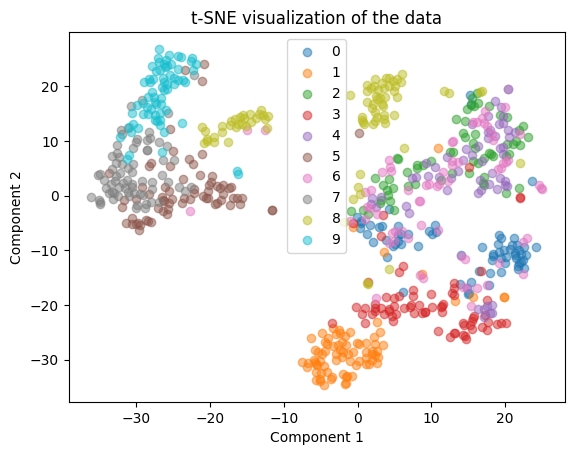

In [37]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Run t-SNE on the subset of data
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_s)

# Visualize the data in 2D using a scatter plot
fig, ax = plt.subplots()

# For each unique label in target_s, plot its corresponding t-SNE components
unique_labels = np.unique(target_s)
for label in unique_labels:
    indices = target_s == label
    ax.scatter(data_tsne[indices, 0], data_tsne[indices, 1], label=label, alpha=0.5)

# Setting the legend
ax.legend()
ax.set_title('t-SNE visualization of the data')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

plt.show()